In [14]:
json.__version__

'2.0.9'

In [13]:
#Importing dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import json
import streamlit as st
warnings.filterwarnings('ignore')
sns.set_theme(style = 'darkgrid')

In [3]:
#Reading and displaying the dataset
data = pd.read_csv('E:\DataScience-Projects\Crop_Recommendation\Data\Crop_Recommendation.csv')
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.label.value_counts()

mothbeans      100
watermelon     100
mango          100
kidneybeans    100
jute           100
apple          100
rice           100
lentil         100
mungbean       100
blackgram      100
orange         100
chickpea       100
pigeonpeas     100
coffee         100
muskmelon      100
pomegranate    100
cotton         100
papaya         100
grapes         100
banana         100
coconut        100
maize          100
Name: label, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True)

In [12]:
data.groupby('label')['P'].mean()

label
apple          134.22
banana          82.01
blackgram       67.47
chickpea        67.79
coconut         16.93
coffee          28.74
cotton          46.24
grapes         132.53
jute            46.86
kidneybeans     67.54
lentil          68.36
maize           48.44
mango           27.18
mothbeans       48.01
mungbean        47.28
muskmelon       17.72
orange          16.55
papaya          59.05
pigeonpeas      67.73
pomegranate     18.75
rice            47.58
watermelon      17.00
Name: P, dtype: float64

In [18]:
def analyse_crops(dframe, colname):
    plt.figure(figsize = (15, 3))
    plt.xticks(rotation = 90)
    plt.ylabel(colname)
    crops_group = data.groupby('label')
    return sns.barplot(crops_group[colname].mean().index, crops_group[colname].mean().values)
    

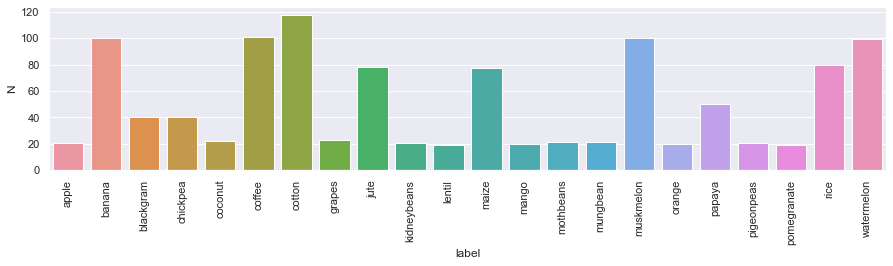

In [19]:
ax = analyse_crops(data, 'N')

In [20]:
st.pyplot()

<AxesSubplot:xlabel='label', ylabel='N'>

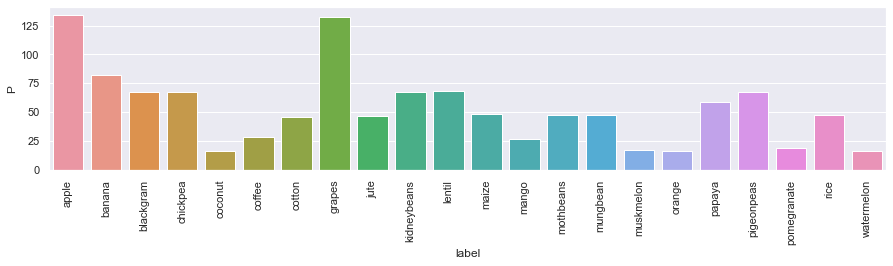

In [103]:
analyse_crops(data, 'P')

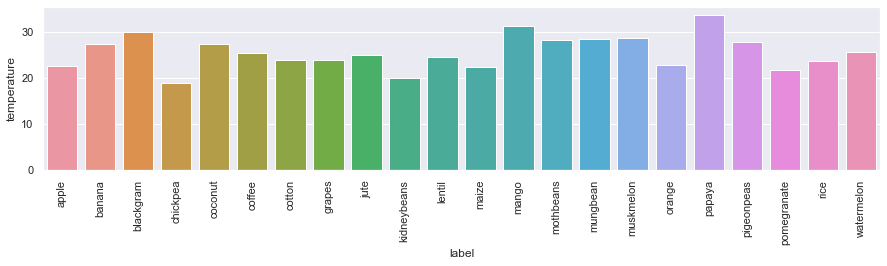

In [104]:
analyse_crops(data, 'temperature')

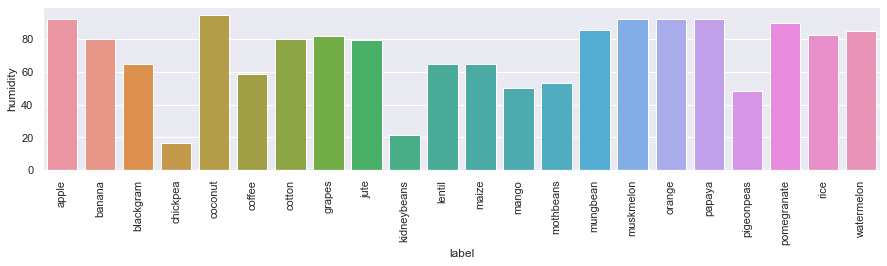

In [105]:
analyse_crops(data, 'humidity')

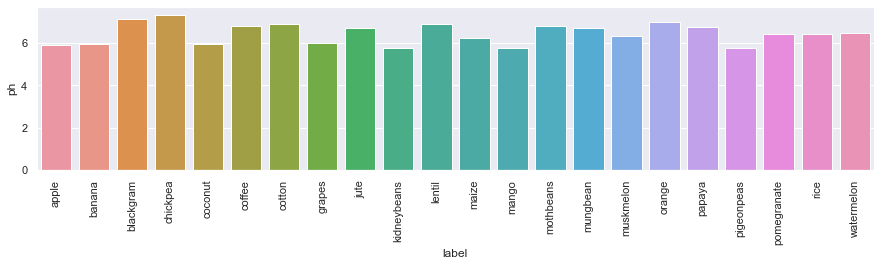

In [106]:
analyse_crops(data, 'ph')

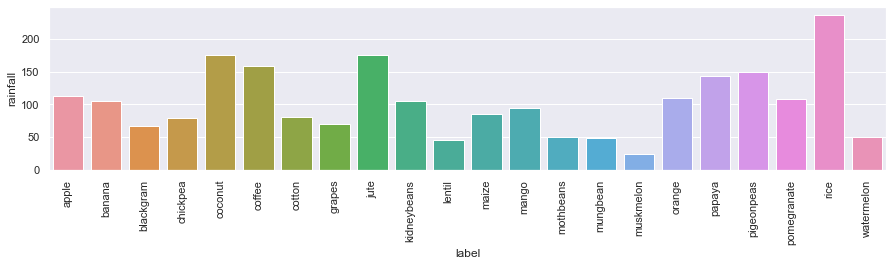

In [107]:
analyse_crops(data, 'rainfall')

In [108]:
def HandleOutliers(dframe, cols, thresh = 3, handle = False):
    for i in cols:
        
        limit = dframe[i].mean() + thresh*dframe[i].std()#Any data point that lies above 2 standard deviations will be considered as an outlier
        print('column {0} has'.format(i), dframe.loc[dframe[i] > limit, i].shape[0], 'outliers')
        if handle:
            dframe.loc[dframe[i] > limit, i] = dframe[i].mean()
        

In [111]:
HandleOutliers(data, data.columns[:-1], thresh = 3)

column N has 0 outliers
column P has 0 outliers
column K has 94 outliers
column temperature has 22 outliers
column humidity has 0 outliers
column ph has 20 outliers
column rainfall has 22 outliers
